In [1]:
from datasets import load_dataset
import pandas as pd     
import pyarrow as pa
import matplotlib.pyplot as plt      
import seaborn as sns 
import os

/home/katy/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
data_files = {"train": ["./Dataset/train/data-00000-of-00004.arrow","./Dataset/train/data-00001-of-00004.arrow","./Dataset/train/data-00002-of-00004.arrow","./Dataset/train/data-00003-of-00004.arrow"]}
data_file={"validation":["./Dataset/validation/data-00000-of-00001.arrow"]}
my_dataset = load_dataset("arrow", data_files=data_files, split="train")
my_dataset2=load_dataset("arrow", data_files=data_file, split="validation")
my_dataset=my_dataset.to_pandas()
my_dataset2=my_dataset2.to_pandas()

dataset=pd.concat([my_dataset,my_dataset2])
print(my_dataset2.head())


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

                                               image  age  gender  race  \
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    1       0     0   
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    6       1     0   
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    4       0     3   
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    3       1     5   
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    3       0     6   

   service_test  
0         False  
1          True  
2          True  
3          True  
4         False  


In [17]:
print(my_dataset['gender'].value_counts())
porcentajes = my_dataset['gender'].value_counts(normalize=True).mul(100)
print(porcentajes)

0    45986
1    40758
Name: gender, dtype: int64
0    53.013465
1    46.986535
Name: gender, dtype: float64


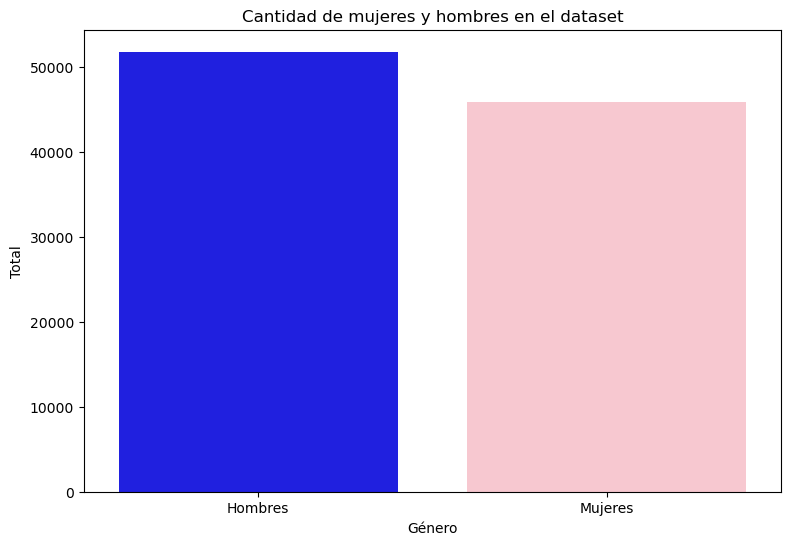

In [7]:

plt.figure(figsize=(9, 6))
sns.countplot(x=dataset['gender'].replace({0: 'Hombres', 1: 'Mujeres'}), data=dataset, palette=['blue', 'pink'])
plt.title('Cantidad de mujeres y hombres en el dataset')
plt.xlabel('Género')
plt.ylabel('Total')

plt.show()


In [9]:
print(my_dataset['age'].value_counts().sort_index())
porcentajes = dataset['age'].value_counts(normalize=True).mul(100)
porcentajes = porcentajes.sort_index()
print(porcentajes)

0     1792
1    10408
2     9103
3    25598
4    19250
5    10744
6     6228
7     2779
8      842
Name: age, dtype: int64
0     2.037913
1    12.041188
2    10.526316
3    29.578906
4    22.088477
5    12.382034
6     7.189502
7     3.173043
8     0.982620
Name: age, dtype: float64


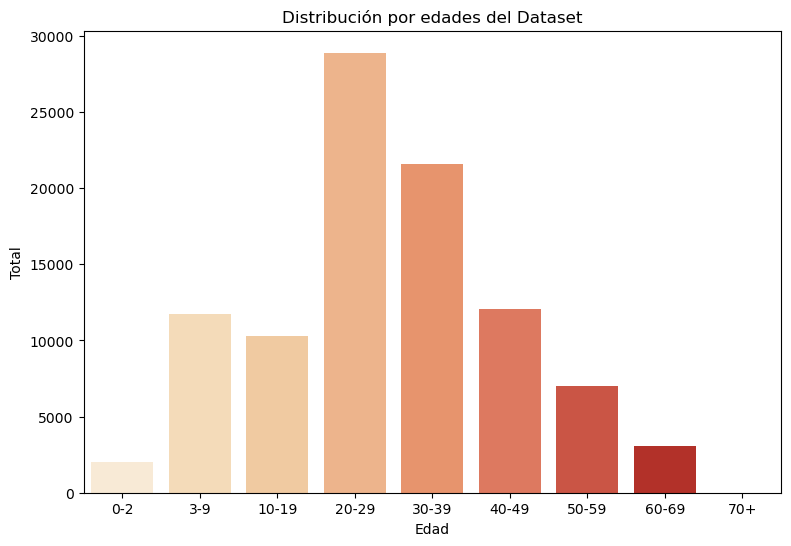

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Orden de las edades según tu especificación
ordered_age_groups = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

plt.figure(figsize=(9, 6))
sns.countplot(x=dataset['age'].replace({0: "0-2", 1:"3-9", 2:"10-19", 3:"20-29", 4:"30-39", 5:"40-49", 6:"50-59", 7:"60-69", 8:"more than 70"}), 
              order=ordered_age_groups,  # Especifica el orden aquí
              data=dataset, 
              palette="OrRd")

plt.title('Distribución por edades del Dataset')
plt.xlabel('Edad')  # Corregido para reflejar que ahora estamos mostrando edades
plt.ylabel('Total')

plt.show()

In [11]:
porcentajes = dataset['race'].value_counts()
porcentajes = porcentajes.sort_index()
print(porcentajes)
porcentajes = dataset['race'].value_counts(normalize=True).mul(100)

0    13837
1    13835
2    13789
3    18612
4    10425
5    14990
6    12210
Name: race, dtype: int64


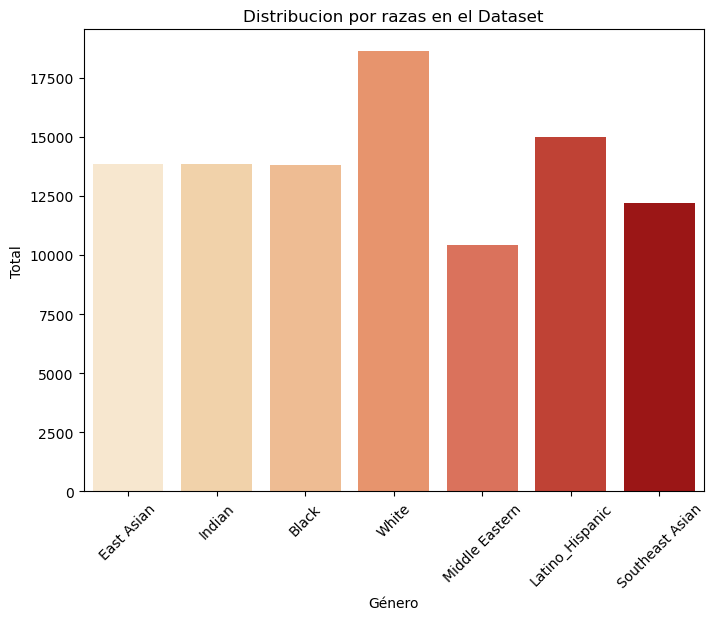

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['race'].replace({0:"East Asian", 1:"Indian", 2:"Black", 3:"White", 4:"Middle Eastern", 5:"Latino_Hispanic", 6:"Southeast Asian"}), data=dataset, palette="OrRd")
plt.title('Distribucion por razas en el Dataset')
plt.xlabel('Género')
plt.ylabel('Total')
plt.xticks(rotation=45)

plt.show()

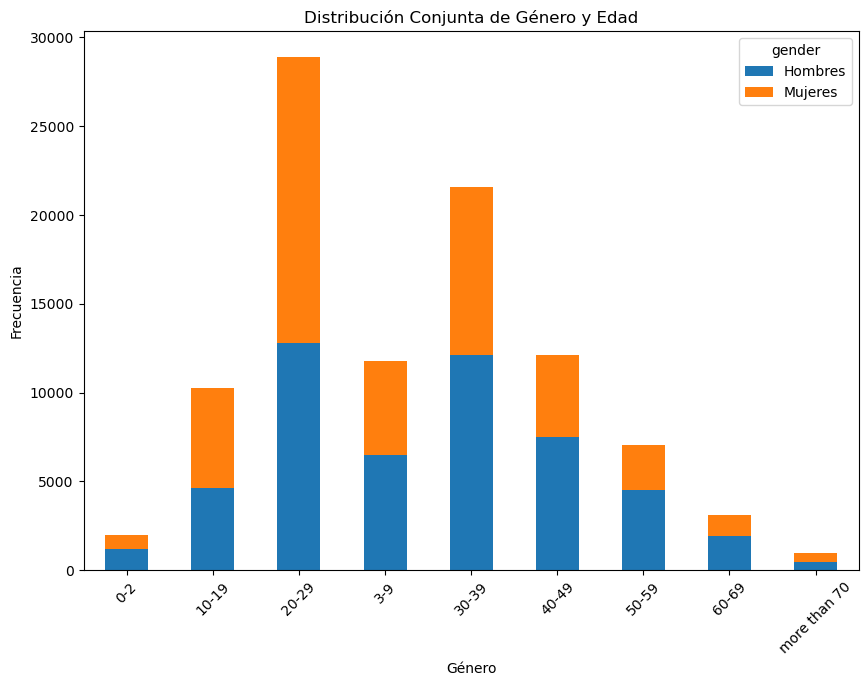

In [14]:
pd.crosstab(dataset['age'].replace({0: "0-2", 1:"3-9", 2:"10-19", 3:"20-29", 4:"30-39", 5:"40-49", 6:"50-59", 7:"60-69", 8:"more than 70"}), dataset['gender'].replace({0: 'Hombres', 1: 'Mujeres'})).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribución Conjunta de Género y Edad')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()

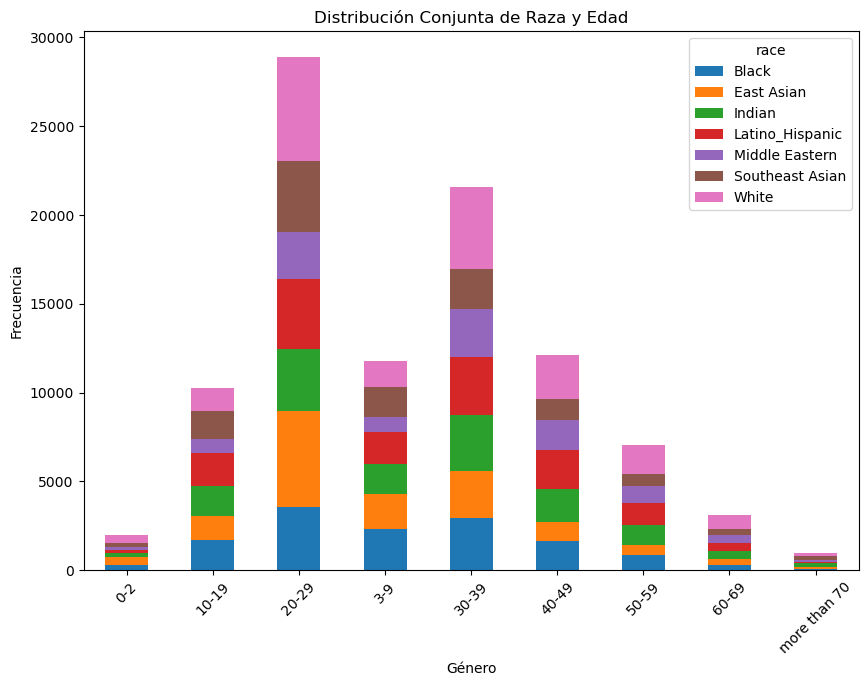

In [15]:
pd.crosstab(dataset['age'].replace({0: "0-2", 1:"3-9", 2:"10-19", 3:"20-29", 4:"30-39", 5:"40-49", 6:"50-59", 7:"60-69", 8:"more than 70"}), dataset['race'].replace({0:"East Asian", 1:"Indian", 2:"Black", 3:"White", 4:"Middle Eastern", 5:"Latino_Hispanic", 6:"Southeast Asian"})).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribución Conjunta de Raza y Edad')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.show()

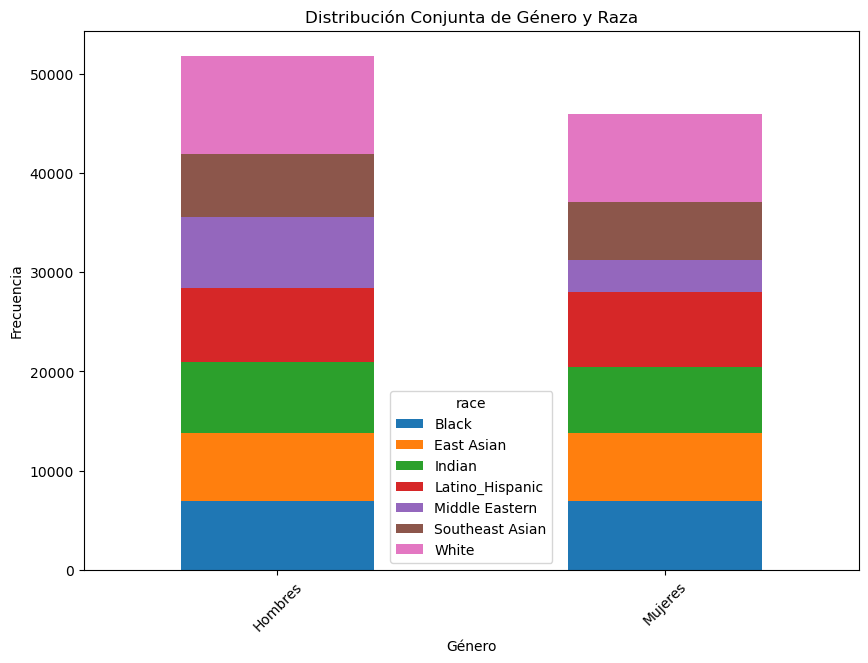

In [16]:
pd.crosstab(dataset['gender'].replace({0: 'Hombres', 1: 'Mujeres'}), dataset['race'].replace({0:"East Asian", 1:"Indian", 2:"Black", 3:"White", 4:"Middle Eastern", 5:"Latino_Hispanic", 6:"Southeast Asian"})).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribución Conjunta de Género y Raza')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.show()